------------------------------------------------------------------------------------------------------------------------------------------------------

## AVERAGE WAVEFORMS NOTEBOOK


##### PLEASE! When you are done with the tutorial, move to the ```notebooks``` folder to start your own analysis 
 In this way, you will be able to keep the tutorial as a reference for future use (or others to use it).

------------------------------------------------------------------------------------------------------------------------------------------------------

In [1]:
import sys; sys.path.insert(0, '../'); from lib import *;
figure_features()

You don't have latex installed. Changing default configuration to tex=False


In [2]:
# Set options for general visualitation
OPT  = {
    "MICRO_SEC":   True,                # Time in microseconds (True/False)
    "NORM":        False,               # Runs can be displayed normalised (True/False)
    "ALIGN":       True,                # Aligns waveforms in peaktime (True/False)
    "LOGY":        False,               # Runs can be displayed in logy (True/False)
    "SHOW_AVE":    "",                  # If computed, vis will show average (AveWvf,AveWvfSPE,etc.)
    "SHOW_PARAM":  False,               # Print terminal information (True/False)
    "CHARGE_KEY":  "ChargeAveRange",    # Select charge info to be displayed. Default: "ChargeAveRange" (if computed)
    "PEAK_FINDER": False,               # Finds possible peaks in the window (True/False)
    "LEGEND":      True,                # Shows plot legend (True/False)
    "SHOW":        True
    }

In [3]:
INPUT_FILE = "TUTORIAL"; OV = 1; PRESET ="EVA"
info = read_input_file(INPUT_FILE)  # Read input file
channels = [0,6]

#-------------------------------- LOAD RUNS ---------------------------------#
run_keys = ["CALIB_RUNS","LIGHT_RUNS","ALPHA_RUNS","MUONS_RUNS","NOISE_RUNS"]
nruns = dict.fromkeys(run_keys)
for key in run_keys:
    try:               nruns[key] = info[key][OV] # Store runs in dictionary
    except IndexError: nruns.pop(key)
print(nruns)

runs = dict.fromkeys(nruns.keys())
for run in runs: runs[run] = load_npy(np.asarray([nruns[run]]).astype(int),np.asarray(channels).astype(int),preset=PRESET,info=info,compressed=True)
#----------------------------------------------------------------------------#

{}


In [24]:
my_runs_alpha = load_npy(np.asarray(runs["ALPHA_RUNS"]["NRun"]).astype(int),np.asarray(channels).astype(int),preset="ALL",info=info,compressed=True)
cut_dict = {'cut_df': [True,[[["0"],"AnaPeakTime","bigger_than",1000,False]]], 'cut_lin_rel': [False,[]], 'cut_peak_finder': [False,[]]}
label, my_runs_alpha = cut_selector(my_runs_alpha, {'runs': ['25'], 'input_file': ['TUTORIAL'], 'filter':cut_dict,'debug': True, 'channels': ['0']}, debug=True)
average_wvfs(my_runs_alpha, key="RawADC", label="Ana",cut_label="Pedestal", centering="NONE", debug=True)

load_npy --> DONE!

load_npy --> DONE!

---- LET'S CUT! ----
-> Found label Raw form key RawADC
...Running generate_cut_array...
... Cutting events for run 13 channel 0 with AnaPeakTime bigger_than 1000.00 ...
Nº of selected events from total events: 8122 (100.00%)
-> Found label Raw form key RawADC
Calculating average wvf with cuts
Computing ANA wvfs from RAW
Averaging wvf: AnaAveWvfPedestal
-> Found label Raw form key RawADC
Calculating average wvf with cuts
Computing ANA wvfs from RAW
Averaging wvf: AnaAveWvfPedestal
Average waveform calculated


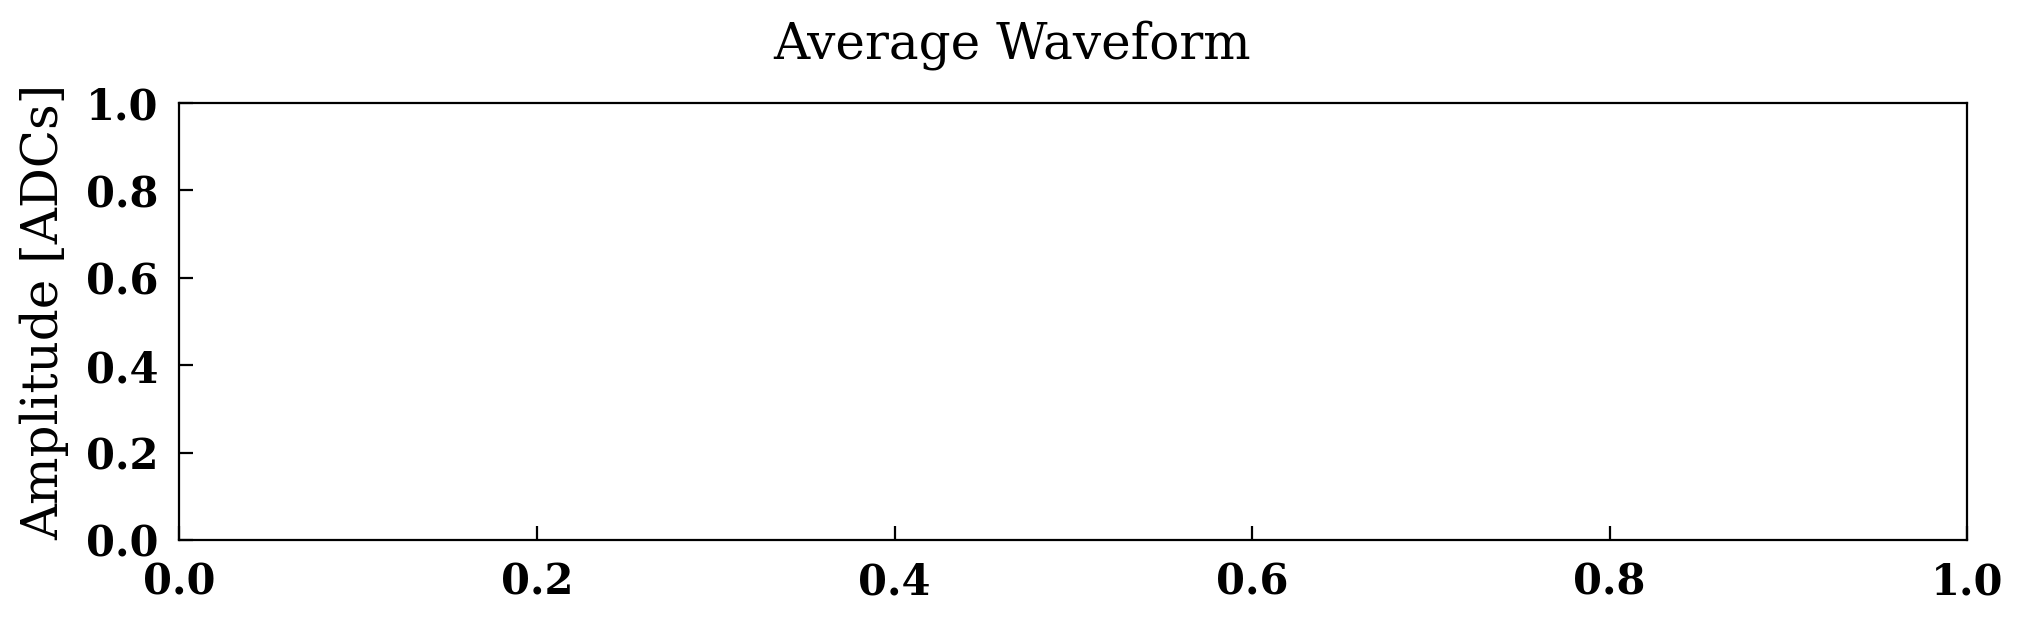

In [7]:
key = "AnaAveWvf"

# nch=len(channels); 
nrun=len(runs.values()); ncol=int((nrun+1)/2); nrow=int((nrun)/2); axs = []

fig, axs = plt.subplots(dpi=200,ncols=nrun,figsize=[10,3],sharey=True)
plt.suptitle("Average Waveform")
fig.supylabel("Amplitude [ADCs]")
for r,run in enumerate(runs.keys()):
    for c,ch in enumerate(channels):
        time_wvf = np.arange(len(runs[run][runs[run]["NRun"][0]][ch][key][0]))*4e-9
        AveWvf = runs[run][runs[run]["NRun"][0]][ch][key][0]
        axs[r].plot(time_wvf, AveWvf,label="Ch "+str(ch))
        axs[r].legend()
        axs[r].grid()
        axs[r].set_xlabel("Time [s]")
plt.show()